In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import numpy as np


data_file_name = 'data.json'
data_file_path = f'/content/drive/My Drive/Project Data/JSON Data/{data_file_name}'

# Open the JSON file
with open(data_file_path, 'r') as file:
    # Load the JSON data
    loaded_json_data = json.load(file)

# create numpy array 'data_array'
data_array = np.array(loaded_json_data['x'])
# convert array values to float
data_array = data_array.astype(float)

In [3]:
from scipy.signal import butter, filtfilt


# Define the filter parameters
lower_freq_limit = 1
higher_freq_limit = 50
sampling_rate = 250  # Assuming a sampling rate of 250Hz

# Calculate the Nyquist frequency
nyquist_freq = 0.5 * sampling_rate

# Normalize the cutoff frequencies
normalized_lower_freq_limit = lower_freq_limit / nyquist_freq
normalized_higher_freq_limit = higher_freq_limit / nyquist_freq

# Determines the sharpness of the filter's cutoff
# (How aggressively the filter removes frequencies outside the desired passband)
filter_order = 2

# Compute the Butterworth filter coefficients
filter_coeff_1, filter_coeff_2 = butter(
    filter_order, [normalized_lower_freq_limit, normalized_higher_freq_limit],
    btype='band')

# Apply the filter to each data sample in data_array
filtered_data = np.zeros_like(data_array)
for row_index in range(data_array.shape[0]):
    for col_index in range(data_array.shape[1]):
        filtered_data[row_index, col_index, :] = filtfilt(
            filter_coeff_1, filter_coeff_2, data_array[row_index, col_index, :])

In [4]:
np_list = filtered_data
np_list = np.nan_to_num(np_list, nan=0)

flattened_data = np_list.reshape(np_list.shape[0], -1)

In [5]:
output_values = loaded_json_data['y']
output_values = [x - 1 for x in output_values]

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC


svc = SVC()
accuracies = cross_val_score(svc, flattened_data, output_values, cv=10)
accuracy = mean_accuracy = accuracies.mean() * 100
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 45.8498



 Classification report: 

               precision    recall  f1-score   support

           0       0.39      0.50      0.44        14
           1       0.48      0.59      0.53        17
           2       0.67      0.50      0.57        12
           3       0.50      0.33      0.40        15

    accuracy                           0.48        58
   macro avg       0.51      0.48      0.48        58
weighted avg       0.50      0.48      0.48        58


 Confusion matrix: 

 [[ 7  5  1  1]
 [ 4 10  0  3]
 [ 2  3  6  1]
 [ 5  3  2  5]]


<Axes: >

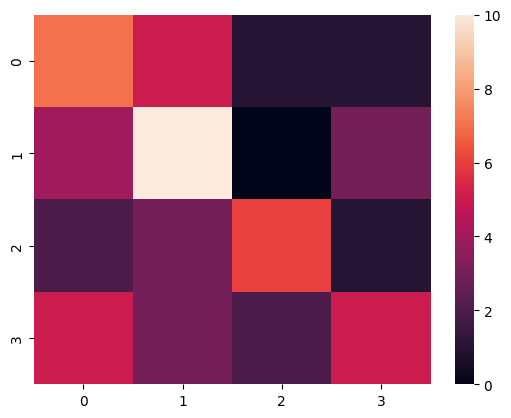

In [7]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(
    flattened_data, output_values, test_size=0.2, random_state=42)

svc.fit(X_train, y_train)

# Evaluate the model
y_pred = svc.predict(X_test)

print('\n Classification report: \n\n',
      classification_report(
          y_test,
          y_pred
      ))


# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Analyze the confusion matrix
print('\n Confusion matrix: \n\n', confusion_mat)

sns.heatmap(confusion_mat)